# Orchidaceae DNA Sequencing With Machine Learning
In this notebook, I will apply a classification model that can predict a gene's function based on the DNA sequence of the coding sequence alone.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

C:\Users\harsh\AppData\Local\Temp\ipykernel_13052\2859838688.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
Original_data = pd.read_table('orchidaceae_flower.txt')
Orchidaceae_data=Original_data
Orchidaceae_data.tail()

,species,sequence,class
613,Spathoglottis plicata,acaagaattctttttcttctcatttttcttctaaaatggtatcaga...,47
614,Spathoglottis plicata,tcttggttcaaatccttcaatgctggatcaaagatgttccttcttt...,47
615,Spathoglottis plicata,tcttttttacgacctgtggaaattctcggttatgacaataaatcta...,47
616,Spathoglottis plicata,ttccacgaatatcataatttgaatagtatcattacttcaaattcaa...,47
617,Spathoglottis plicata,ctcacttgctcattatcatagcttcaatagttttcttttttacgaa...,47


## We have some data for Orchidaceae DNA sequence coding regions matK and a class label

In [3]:
#from IPython.display import Image
#Image("Capture1.PNG")

In [3]:
# Ecah species Class count
print(Orchidaceae_data['class'].value_counts().sort_index())

class
1     52
2     14
3     21
4     18
5     29
6     19
7     16
8     11
9     14
10    17
11     2
12    25
13    10
14    14
15    10
16    20
17    20
18    20
19    14
20    18
21    28
22    14
23    17
24    23
25    12
26    10
27    20
28    15
29    20
30    13
31    10
32     2
33     4
34     5
35     3
36     6
37     6
38     6
39     2
40     1
41     5
42     8
43     8
44     8
45     1
46     2
47     5
Name: count, dtype: int64


<Axes: xlabel='class'>

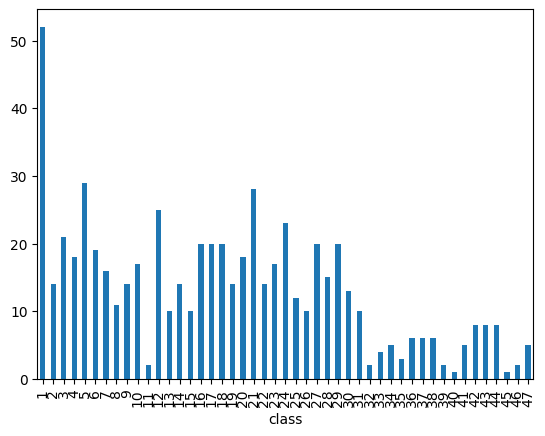

In [4]:
Orchidaceae_data['class'].value_counts().sort_index().plot.bar()

# Select the species which have more data

In [5]:
# Remove the species which has less than 10 Samples
counts = Orchidaceae_data['class'].value_counts()
valid_classes = counts[(counts >= 7) & (counts <= 16)].index
new_Orchidaceae_data = Orchidaceae_data[Orchidaceae_data['class'].isin(valid_classes)]


In [6]:
print(new_Orchidaceae_data['class'].value_counts())

class
7     16
28    15
2     14
14    14
19    14
22    14
9     14
30    13
25    12
8     11
15    10
13    10
26    10
31    10
42     8
43     8
44     8
Name: count, dtype: int64


<Axes: xlabel='class'>

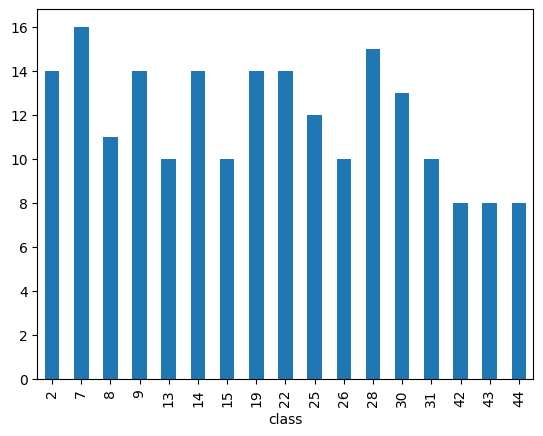

In [7]:
new_Orchidaceae_data['class'].value_counts().sort_index().plot.bar()

In [8]:
new_Orchidaceae_data.head()

,species,sequence,class
52,Paphiopedilum insigne,tgaatctggacccctgaatcctgaattgaatcctacaaggtaaaaa...,2
53,Paphiopedilum insigne,tgaatctggacccctgaatcctgaattgaatcctacaaggtaaaaa...,2
54,Paphiopedilum insigne,aatatttccctttttagaggacaaatttttacatttgaattatgtg...,2
55,Paphiopedilum insigne,tatttccctttttagaggacaaatttttacatttgaattatgtgtc...,2
56,Paphiopedilum insigne,tctggagtctttcttgagcgaacacatttctatgtaaaaatagagc...,2


In [9]:
new_Orchidaceae_data['sequence'].str.len()

52     32767
53     32767
54       858
55       859
56       605
       ...  
605      845
606     1531
607      794
608     1442
609     1538
Name: sequence, Length: 201, dtype: int64

In [10]:
new_Orchidaceae_data['bp']=new_Orchidaceae_data['sequence'].str.len()
new_Orchidaceae_data.head()

C:\Users\harsh\AppData\Local\Temp\ipykernel_13052\3432952982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_Orchidaceae_data['bp']=new_Orchidaceae_data['sequence'].str.len()


,species,sequence,class,bp
52,Paphiopedilum insigne,tgaatctggacccctgaatcctgaattgaatcctacaaggtaaaaa...,2,32767
53,Paphiopedilum insigne,tgaatctggacccctgaatcctgaattgaatcctacaaggtaaaaa...,2,32767
54,Paphiopedilum insigne,aatatttccctttttagaggacaaatttttacatttgaattatgtg...,2,858
55,Paphiopedilum insigne,tatttccctttttagaggacaaatttttacatttgaattatgtgtc...,2,859
56,Paphiopedilum insigne,tctggagtctttcttgagcgaacacatttctatgtaaaaatagagc...,2,605


## Remove the samples whose bp >1000

In [11]:
new_Orchidaceae_data_update=new_Orchidaceae_data[new_Orchidaceae_data['bp']<=1000]
new_Orchidaceae_data_update

,species,sequence,class,bp
54,Paphiopedilum insigne,aatatttccctttttagaggacaaatttttacatttgaattatgtg...,2,858
55,Paphiopedilum insigne,tatttccctttttagaggacaaatttttacatttgaattatgtgtc...,2,859
56,Paphiopedilum insigne,tctggagtctttcttgagcgaacacatttctatgtaaaaatagagc...,2,605
58,Paphiopedilum insigne,gtgtcagatctactaatacctcatcccatacatctggaaatcttgg...,2,814
59,Paphiopedilum insigne,atttgaatagtctcgttacttcaaagaaattcatttacgccttttc...,2,600
...,...,...,...,...
602,Stanhopea tigrina,ctaataccctatcccatccatctggaaatcttggttcaaatccttc...,44,798
603,Stanhopea tigrina,aatatttccctttttagaggataaattatcacatttaaattatgtg...,44,861
604,Stanhopea tigrina,aatatttccctttttagaggataaattatcacatttaaattatgtg...,44,844
605,Stanhopea tigrina,tcacatttaaattatgtgtcagatctactaataccctatcccatcc...,44,845


In [12]:
print(new_Orchidaceae_data_update['class'].value_counts())

class
2     11
14    10
7     10
30     9
22     9
19     8
28     8
13     6
26     6
25     5
44     5
15     4
8      4
42     3
43     3
9      1
31     1
Name: count, dtype: int64


# So finally we working on this species

In [13]:
new_Orchidaceae_data_update['species'].unique()

array(['Paphiopedilum insigne', 'Vanilla planifolia', 'Cymbidium faberi',
       'Phaius tankervilleae', 'Paphiopedilum primulinum',
       'Cypripedium calceolus', 'Paphiopedilum malipoense',
       'Vanda tessellata', 'Calanthe discolor', 'Neofinetia falcata',
       'Papilionanthe teres', 'Coelogyne flaccida',
       'Paphiopedilum spicerianum', 'Bletilla ochracea',
       'Maxillaria cucullata', 'Renanthera imschootiana',
       'Stanhopea tigrina'], dtype=object)

<Axes: xlabel='class'>

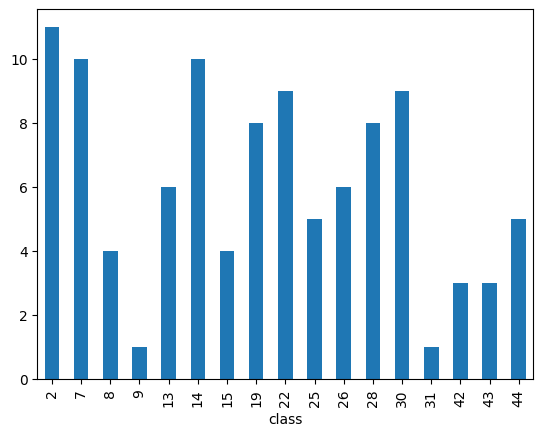

In [14]:
new_Orchidaceae_data_update['class'].value_counts().sort_index().plot.bar()

In [15]:
# Remove the species which has less than 5 Samples
counts = new_Orchidaceae_data_update['class'].value_counts()
new_Orchidaceae_data_update = new_Orchidaceae_data_update[~new_Orchidaceae_data_update['class'].isin(counts[counts < 5].index)]

<Axes: xlabel='class'>

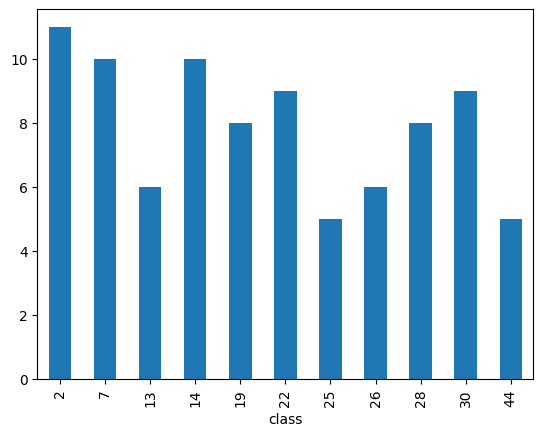

In [16]:
new_Orchidaceae_data_update['class'].value_counts().sort_index().plot.bar()

# So finally we working on this species

In [17]:
new_Orchidaceae_data_update['species'].unique()

array(['Paphiopedilum insigne', 'Vanilla planifolia',
       'Paphiopedilum primulinum', 'Cypripedium calceolus',
       'Vanda tessellata', 'Calanthe discolor', 'Neofinetia falcata',
       'Papilionanthe teres', 'Coelogyne flaccida',
       'Paphiopedilum spicerianum', 'Stanhopea tigrina'], dtype=object)

# Just rename the dataframe

In [18]:
Orchidaceae_data=new_Orchidaceae_data_update

## We have some data for Orchidaceae DNA sequence coding regions matK and a class label

# Treating DNA sequence as a "language", otherwise known as k-mer counting
A challenge that remains is that none of these above methods results in vectors of uniform length, and that is a requirement for feeding data to a classification or regression algorithm. So with the above methods you have to resort to things like truncating sequences or padding with "n" or "0" to get vectors of uniform length.

DNA and protein sequences can be viewed metaphorically as the language of life. The language encodes instructions as well as function for the molecules that are found in all life forms. The sequence language analogy continues with the genome as the book, subsequences (genes and gene families) are sentences and chapters, k-mers and peptides (motifs) are words, and nucleotide bases and amino acids are the alphabet. Since the analogy seems so apt, it stands to reason that the amazing work done in the natural language processing field should also apply to the natural language of DNA and protein sequences.

The method I use here is simple and easy. I first take the long biological sequence and break it down into k-mer length overlapping “words”. For example, if I use "words" of length 6 (hexamers), “ATGCATGCA” becomes: ‘ATGCAT’, ‘TGCATG’, ‘GCATGC’, ‘CATGCA’. Hence our example sequence is broken down into 4 hexamer words.

Here I am using hexamer “words” but that is arbitrary and word length can be tuned to suit the particular situation. The word length and amount of overlap need to be determined empirically for any given application.

In genomics, we refer to these types of manipulations as "k-mer counting", or counting the occurances of each possible k-mer sequence. There are specialized tools for this, but the Python natural language processing tools make it supe easy.

Here is a function that can be used to convert any sequence (string) to overlapping k-mer words:

## Let's define a function to collect all possible overlapping k-mers of a specified length from any sequence string. We will basically apply the k-mers to the complete sequences.¶

In [19]:
# function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size=4):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [20]:
Orchidaceae_data.head()

,species,sequence,class,bp
54,Paphiopedilum insigne,aatatttccctttttagaggacaaatttttacatttgaattatgtg...,2,858
55,Paphiopedilum insigne,tatttccctttttagaggacaaatttttacatttgaattatgtgtc...,2,859
56,Paphiopedilum insigne,tctggagtctttcttgagcgaacacatttctatgtaaaaatagagc...,2,605
58,Paphiopedilum insigne,gtgtcagatctactaatacctcatcccatacatctggaaatcttgg...,2,814
59,Paphiopedilum insigne,atttgaatagtctcgttacttcaaagaaattcatttacgccttttc...,2,600


In [21]:
len(Orchidaceae_data['sequence'])

87

## Now we can convert our training data sequences into short overlapping k-mers of legth 6. Lets do that for each species of data we have using our getKmers function.¶

In [22]:
Orchidaceae_data['words'] = Orchidaceae_data.apply(lambda x: getKmers(x['sequence']), axis=1)
Orchidaceae_data = Orchidaceae_data.drop('sequence', axis=1)

C:\Users\harsh\AppData\Local\Temp\ipykernel_13052\2271004804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Orchidaceae_data['words'] = Orchidaceae_data.apply(lambda x: getKmers(x['sequence']), axis=1)


## Now, our coding sequence data is changed to lowercase, split up into all possible k-mer words of length 6 and ready for the next step. Let's take a look.

In [23]:
Orchidaceae_data.head()

,species,class,bp,words
54,Paphiopedilum insigne,2,858,"[aata, atat, tatt, attt, tttc, ttcc, tccc, ccc..."
55,Paphiopedilum insigne,2,859,"[tatt, attt, tttc, ttcc, tccc, ccct, cctt, ctt..."
56,Paphiopedilum insigne,2,605,"[tctg, ctgg, tgga, ggag, gagt, agtc, gtct, tct..."
58,Paphiopedilum insigne,2,814,"[gtgt, tgtc, gtca, tcag, caga, agat, gatc, atc..."
59,Paphiopedilum insigne,2,600,"[attt, tttg, ttga, tgaa, gaat, aata, atag, tag..."


## Since we are going to use scikit-learn natural language processing tools to do the k-mer counting, we need to now convert the lists of k-mers for each gene into string sentences of words that the count vectorizer can use. We can also make a y variable to hold the class labels. Let's do that now.

In [24]:
Orchidaceae_texts = list(Orchidaceae_data['words'])
for item in range(len(Orchidaceae_texts)):
    Orchidaceae_texts[item] = ' '.join(Orchidaceae_texts[item])
y_data = Orchidaceae_data.iloc[:, 0].values

In [25]:
Orchidaceae_texts

['aata atat tatt attt tttc ttcc tccc ccct cctt cttt tttt tttt ttta ttag taga agag gagg agga ggac gaca acaa caaa aaat aatt attt tttt tttt ttta ttac taca acat catt attt tttg ttga tgaa gaat aatt atta ttat tatg atgt tgtg gtgt tgtc gtca tcag caga agat gatc atct tcta ctac tact acta ctaa taat aata atac tacc acct cctc ctca tcat catc atcc tccc ccca ccat cata atac taca acat catc atct tctg ctgg tgga ggaa gaaa aaat aatc atct tctt cttg ttgg tggt ggtt gttc ttca tcaa caag aagt agta gtac tact actt cttc ttca tcaa caat aatg atgc tgct gctg ctgg tgga ggat gatc atca tcaa caag aagg agga ggat gatg atgt tgtt gttc ttcc tcct cctt cttc ttct tctt cttt tttg ttgc tgca gcat catt attt ttta ttat tatt attg ttgc tgcg gcga cgat gatt attt tttc ttct tctt cttt tttt tttc ttcc tcca ccac cacg acga cgaa gaat aata atat tatc atca tcat cata ataa taat aatt attt tttg ttga tgaa gaat aata atag tagt agtc gtct tctc ctcg tcgt cgtt gtta ttac tact actt cttc ttca tcaa caaa aaag aaga agaa gaaa aaat aatt attc ttca tcat catt attt ttta ttac tac

In [26]:
print(y_data)

['Paphiopedilum insigne' 'Paphiopedilum insigne' 'Paphiopedilum insigne'
 'Paphiopedilum insigne' 'Paphiopedilum insigne' 'Paphiopedilum insigne'
 'Paphiopedilum insigne' 'Paphiopedilum insigne' 'Paphiopedilum insigne'
 'Paphiopedilum insigne' 'Paphiopedilum insigne' 'Vanilla planifolia'
 'Vanilla planifolia' 'Vanilla planifolia' 'Vanilla planifolia'
 'Vanilla planifolia' 'Vanilla planifolia' 'Vanilla planifolia'
 'Vanilla planifolia' 'Vanilla planifolia' 'Vanilla planifolia'
 'Paphiopedilum primulinum' 'Paphiopedilum primulinum'
 'Paphiopedilum primulinum' 'Paphiopedilum primulinum'
 'Paphiopedilum primulinum' 'Paphiopedilum primulinum'
 'Cypripedium calceolus' 'Cypripedium calceolus' 'Cypripedium calceolus'
 'Cypripedium calceolus' 'Cypripedium calceolus' 'Cypripedium calceolus'
 'Cypripedium calceolus' 'Cypripedium calceolus' 'Cypripedium calceolus'
 'Cypripedium calceolus' 'Vanda tessellata' 'Vanda tessellata'
 'Vanda tessellata' 'Vanda tessellata' 'Vanda tessellata'
 'Vanda tessel

## Now we will apply the BAG of WORDS using CountVectorizer using NLP

In [27]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(Orchidaceae_texts)

In [28]:
print(X.shape)

(87, 3403)


## If we have a look at class balance we can see we have relatively balanced dataset.

<Axes: xlabel='class'>

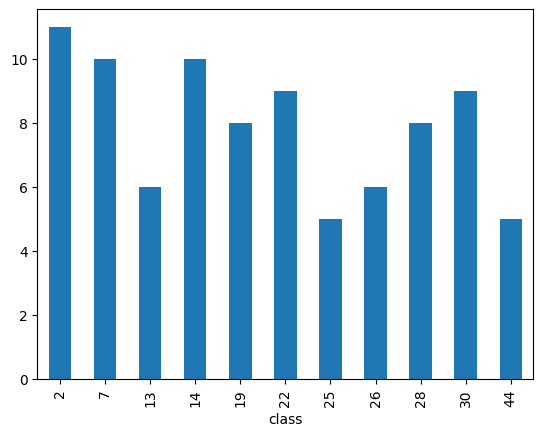

In [29]:
Orchidaceae_data['class'].value_counts().sort_index().plot.bar()

In [30]:
# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_data, 
                                                    test_size = 0.20, 
                                                    random_state=42)

In [31]:
print(X_train.shape)
print(X_test.shape)

(69, 3403)
(18, 3403)


## 1. LOGISTIC REGRESSION

In [32]:
# 1. LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
#Fit the model
LR_model.fit(X_train, y_train)
LR_y_pred = LR_model.predict(X_test)
#Confusion Matrix 
from sklearn.metrics import confusion_matrix
LR_cm=confusion_matrix(y_test,LR_y_pred)
print(LR_cm)
# Accuracy
from sklearn.metrics import accuracy_score
LR_ac=accuracy_score(y_test,LR_y_pred)
print(LR_ac)
#Score/Accuracy
ac_lr=LR_model.score(X_test, y_test)*100
print("\nTHE ACCURACY OF LOGISTIC REGRESSION is: ",ac_lr)
from sklearn.metrics import classification_report
LR_cr=classification_report(y_test,LR_y_pred)
print(LR_cr)

[[1 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2]]
0.8888888888888888

THE ACCURACY OF LOGISTIC REGRESSION is:  88.88888888888889
                           precision    recall  f1-score   support

        Calanthe discolor       1.00      1.00      1.00         1
       Coelogyne flaccida       1.00      0.67      0.80         3
    Cypripedium calceolus       1.00      1.00      1.00         1
       Neofinetia falcata       0.00      0.00      0.00         0
    Paphiopedilum insigne       1.00      1.00      1.00         3
 Paphiopedilum primulinum       1.00      1.00      1.00         2
Paphiopedilum spicerianum       1.00      1.00      1.00         3
      Papilionanthe teres       0.00      0.00      0.00         1
        Stanhopea tigrina       1.00     

c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

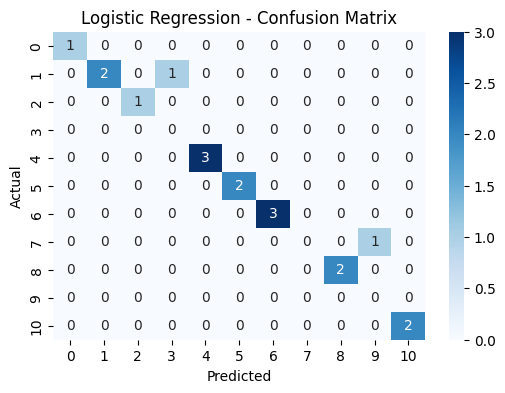

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(LR_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

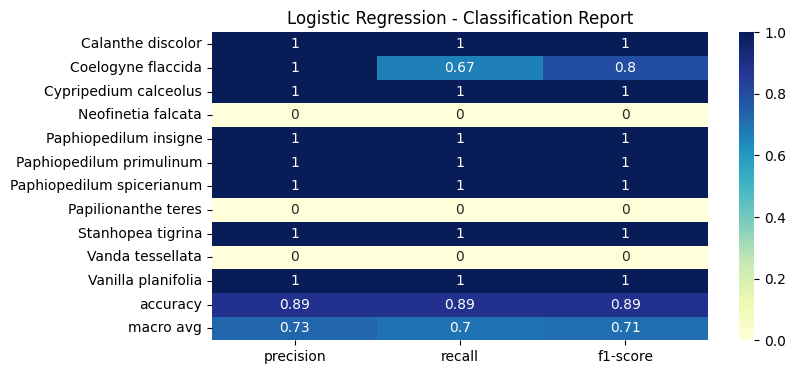

In [34]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, LR_y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='YlGnBu')  # Skip accuracy row
plt.title('Logistic Regression - Classification Report')
plt.show()


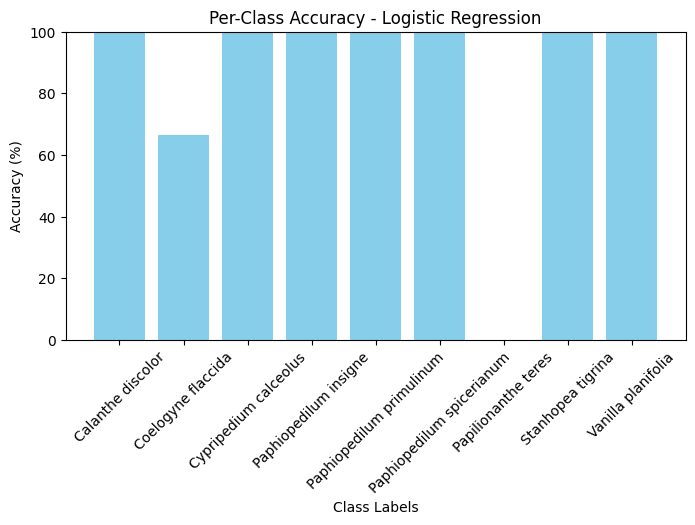

In [35]:
import numpy as np

# Accuracy per class
correct = LR_y_pred == y_test
class_accuracy = {}
for label in np.unique(y_test):
    class_indices = np.where(y_test == label)
    class_accuracy[label] = np.mean(correct[class_indices]) * 100

# Plot
plt.figure(figsize=(8, 4))
plt.bar(class_accuracy.keys(), class_accuracy.values(), color='skyblue')
plt.xlabel('Class Labels')
plt.ylabel('Accuracy (%)')
plt.title('Per-Class Accuracy - Logistic Regression')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()


In [36]:
###lOGISTIC lIGRESSIION Classifier ###
from sklearn.linear_model import LogisticRegression
classifier =LogisticRegression()
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted                  Calanthe discolor  Coelogyne flaccida  \
Actual                                                             
Calanthe discolor                          1                   0   
Coelogyne flaccida                         0                   2   
Cypripedium calceolus                      0                   0   
Paphiopedilum insigne                      0                   0   
Paphiopedilum primulinum                   0                   0   
Paphiopedilum spicerianum                  0                   0   
Papilionanthe teres                        0                   0   
Stanhopea tigrina                          0                   0   
Vanilla planifolia                         0                   0   

Predicted                  Cypripedium calceolus  Neofinetia falcata  \
Actual                                                                 
Calanthe discolor                              0                   0   
Coelogyne flaccid

c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 2. RANDOM FOREST CLASSIFIER

In [37]:
# 2. RANDOM FOREST CLASSIFIER

#Train the model
from sklearn.ensemble import RandomForestClassifier
RFC_model = RandomForestClassifier(n_estimators=1000)
#Fit
RFC_model.fit(X_train, y_train)
RFC_y_pred = RFC_model.predict(X_test)
#Confusion Matrix 
from sklearn.metrics import confusion_matrix
RF_cm=confusion_matrix(y_test,RFC_y_pred)
print(RF_cm)
# Accuracy
from sklearn.metrics import accuracy_score
RFC_ac=accuracy_score(y_test,RFC_y_pred)
print(RFC_ac)
#Score/Accuracy
ac_rfc=RFC_model.score(X_test, y_test)*100
print("\nTHE ACCURACY OF RANDOM FOREST REGRESSOR is: ",ac_rfc)
from sklearn.metrics import classification_report
RF_cr=classification_report(y_test,RFC_y_pred)
print(RF_cr)

[[1 0 0 0 0 0 0 0 0 0]
 [1 2 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2]]
0.8888888888888888

THE ACCURACY OF RANDOM FOREST REGRESSOR is:  88.88888888888889
                           precision    recall  f1-score   support

        Calanthe discolor       0.50      1.00      0.67         1
       Coelogyne flaccida       1.00      0.67      0.80         3
    Cypripedium calceolus       1.00      1.00      1.00         1
    Paphiopedilum insigne       1.00      1.00      1.00         3
 Paphiopedilum primulinum       1.00      1.00      1.00         2
Paphiopedilum spicerianum       1.00      1.00      1.00         3
      Papilionanthe teres       0.00      0.00      0.00         1
        Stanhopea tigrina       1.00      1.00      1.00         2
         Vanda tessellata       0.00      0.00      0.00         0
       Vanilla 

c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

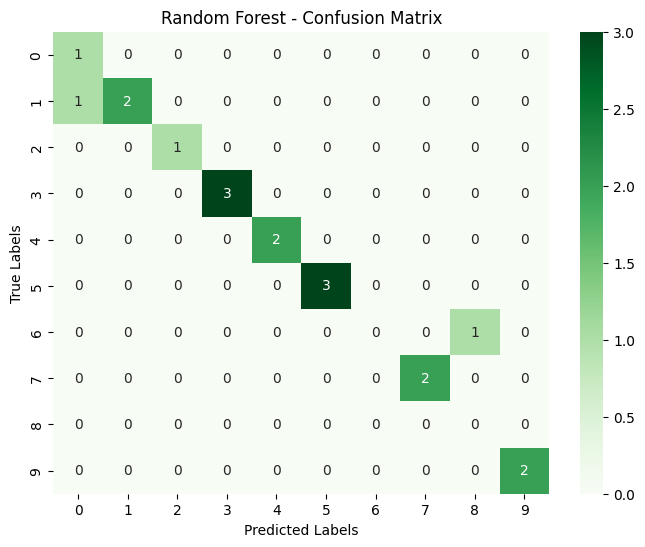

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(RF_cm, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


##  3. K-NEAREST NEIGHBHORS CLASSIFIER

In [39]:
# 3. K-NEAREST NEIGHBORS (KNN) CLASSIFIER

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Initialize the model
KNN_model = KNeighborsClassifier(n_neighbors=5)  # You can tune this value later

# Fit the model
KNN_model.fit(X_train, y_train)

# Predict on test data
KNN_y_pred = KNN_model.predict(X_test)

# Confusion Matrix
KNN_cm = confusion_matrix(y_test, KNN_y_pred)
print("Confusion Matrix:\n", KNN_cm)

# Accuracy
KNN_ac = accuracy_score(y_test, KNN_y_pred)
print("Accuracy Score:", KNN_ac)

# Model score
ac_knn = KNN_model.score(X_test, y_test) * 100
print("\nTHE ACCURACY OF KNN CLASSIFIER is: ", ac_knn)

# Classification Report
KNN_cr = classification_report(y_test, KNN_y_pred)
print(KNN_cr)


Confusion Matrix:
 [[1 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2]]
Accuracy Score: 0.6666666666666666

THE ACCURACY OF KNN CLASSIFIER is:  66.66666666666666
                           precision    recall  f1-score   support

        Calanthe discolor       1.00      1.00      1.00         1
       Coelogyne flaccida       1.00      0.67      0.80         3
    Cypripedium calceolus       1.00      1.00      1.00         1
       Neofinetia falcata       0.00      0.00      0.00         0
    Paphiopedilum insigne       0.43      1.00      0.60         3
 Paphiopedilum primulinum       1.00      0.50      0.67         2
Paphiopedilum spicerianum       0.00      0.00      0.00         3
      Papilionanthe teres       0.00      0.00      0.00         1
        Sta

c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

## 4. RANDOM FOREST CLASSIFIER

In [40]:
###RandomForestClassifier Classifier ###
from sklearn.ensemble import RandomForestClassifier
classifier4 =RandomForestClassifier(n_estimators=1000)
classifier4.fit(X_train, y_train)


y_pred = classifier4.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted                  Calanthe discolor  Coelogyne flaccida  \
Actual                                                             
Calanthe discolor                          1                   0   
Coelogyne flaccida                         1                   2   
Cypripedium calceolus                      0                   0   
Paphiopedilum insigne                      0                   0   
Paphiopedilum primulinum                   0                   0   
Paphiopedilum spicerianum                  0                   0   
Papilionanthe teres                        0                   0   
Stanhopea tigrina                          0                   0   
Vanilla planifolia                         0                   0   

Predicted                  Cypripedium calceolus  Paphiopedilum insigne  \
Actual                                                                    
Calanthe discolor                              0                      0   
Coelogyn

c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [42]:
best_classifier = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=1,
    bootstrap=False
)
best_classifier.fit(X_train, y_train)

y_pred = best_classifier.predict(X_test)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))


accuracy = 0.889 
precision = 0.917 
recall = 0.889 
f1 = 0.893


c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
import joblib

joblib.dump(classifier4, 'orchid_model4.pkl')



['orchid_model4.pkl']

In [44]:
joblib.dump(cv, 'vectorizer4.pkl')

['vectorizer4.pkl']

In [ ]:
from flask import Flask, request, render_template_string
import joblib

# from your_module import getKmers  # Define this function in the same notebook or import if needed

app = Flask(__name__)
model = joblib.load('orchid_model4.pkl')
vectorizer = joblib.load('vectorizer4.pkl')

# Dummy k-mer function for demonstration. Replace with your actual function.
def getKmers(sequence, size=4):
    return [sequence[x:x+size] for x in range(len(sequence) - size + 1)]

# Inline HTML template
html_template = '''
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Orchid Species Predictor</title>
    <style>
        body {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            padding: 0;
            margin: 0;
            background: linear-gradient(to right, #fefcea, #f1da36);
        }
        .header {
            text-align: center;
            padding: 30px 10px;
            background-color: #fff;
            box-shadow: 0px 2px 10px rgba(0,0,0,0.1);
        }
        .header h1 {
            margin: 0;
            color: #4b0082;
        }
        .gallery {
            display: flex;
            justify-content: center;
            gap: 20px;
            flex-wrap: wrap;
            padding: 20px;
            background-color: #fafafa;
        }
        .gallery img {
            height: 150px;
            border-radius: 10px;
            object-fit: cover;
            box-shadow: 0px 4px 8px rgba(0,0,0,0.1);
        }
        .container {
            background-color: white;
            padding: 30px;
            border-radius: 15px;
            width: 60%;
            margin: 30px auto;
            box-shadow: 0px 10px 20px rgba(0,0,0,0.1);
        }
        textarea {
            width: 100%;
            padding: 12px;
            border-radius: 8px;
            border: 1px solid #ccc;
            resize: vertical;
            font-size: 16px;
        }
        input[type=submit] {
            background-color: #4b0082;
            color: white;
            padding: 12px 25px;
            border: none;
            border-radius: 8px;
            font-size: 16px;
            cursor: pointer;
            margin-top: 10px;
        }
        input[type=submit]:hover {
            background-color: #360062;
        }
        .result {
            margin-top: 20px;
            font-size: 20px;
            color: #333;
            text-align: center;
        }
    </style>
</head>
<body>
    <div class="header">
        <h1>🌸 Orchid Species Predictor 🌸</h1>
    </div>

    <div class="gallery">
        <img src="https://upload.wikimedia.org/wikipedia/commons/e/e0/Phalaenopsis_JPEG.png" alt="Phalaenopsis">
        <img src="https://upload.wikimedia.org/wikipedia/commons/f/f6/Cattleya_labiata2.jpg" alt="Cattleya">
        <img src="https://upload.wikimedia.org/wikipedia/commons/3/37/Dendrobium_kingianum.jpg" alt="Dendrobium">
    </div>

    <div class="container">
        <form method="POST" action="/predict">
            <label for="sequence"><strong>Enter DNA Sequence:</strong></label><br>
            <textarea name="sequence" rows="5" placeholder="e.g. ATCGTACGTAGC..." required></textarea><br>
            <input type="submit" value="Predict">
        </form>

        {% if prediction %}
            <div class="result">🌿 Predicted Species: <strong>{{ prediction }}</strong></div>
        {% endif %}
    </div>
</body>
</html>

'''

@app.route('/')
def home():
    return render_template_string(html_template)

@app.route('/predict', methods=['POST'])
def predict():
    sequence = request.form['sequence']
    k_mers = getKmers(sequence)
    joined_seq = ' '.join(k_mers)
    vect = vectorizer.transform([joined_seq])
    prediction = model.predict(vect)[0]
    return render_template_string(html_template, prediction=f'Predicted Species Class: {prediction}')

if __name__ == "__main__":
    app.run(debug=False, use_reloader=False)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [12/May/2025 16:28:08] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/May/2025 16:28:40] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [12/May/2025 16:29:56] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [12/May/2025 16:30:22] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [12/May/2025 16:30:48] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [12/May/2025 16:35:32] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [12/May/2025 16:38:49] "POST /predict HTTP/1.1" 200 -


# 5.GRADIENT BOOSTING Classifier

In [45]:
# 3. GRADIENT BOOSTING Classifier

#Train the model
from sklearn.ensemble import GradientBoostingClassifier
GBC_model = GradientBoostingClassifier(n_estimators=100, max_depth=4)
#Fit
GBC_model.fit(X_train, y_train)
GBC_y_pred = GBC_model.predict(X_test)
#Confusion Matrix 
from sklearn.metrics import confusion_matrix
GBC_cm=confusion_matrix(y_test,GBC_y_pred)
print(GBC_cm)
# Accuracy
from sklearn.metrics import accuracy_score
GBC_ac=accuracy_score(y_test,GBC_y_pred)
print(GBC_ac)
ac_gbc=GBC_model.score(X_test, y_test)*100
print("\nTHE ACCURACY OF GRADIENT BOOSTING REGRESSOR is: ",ac_gbc)
from sklearn.metrics import classification_report
GBC_cr=classification_report(y_test,GBC_y_pred)
print(GBC_cr)

[[1 0 0 0 0 0 0 0 0 0]
 [0 2 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 2]]
0.9444444444444444

THE ACCURACY OF GRADIENT BOOSTING REGRESSOR is:  94.44444444444444
                           precision    recall  f1-score   support

        Calanthe discolor       1.00      1.00      1.00         1
       Coelogyne flaccida       1.00      0.67      0.80         3
    Cypripedium calceolus       1.00      1.00      1.00         1
       Neofinetia falcata       0.00      0.00      0.00         0
    Paphiopedilum insigne       1.00      1.00      1.00         3
 Paphiopedilum primulinum       1.00      1.00      1.00         2
Paphiopedilum spicerianum       1.00      1.00      1.00         3
      Papilionanthe teres       1.00      1.00      1.00         1
        Stanhopea tigrina       1.00      1.00      1.00         2
       Vani

c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

## 6. GRADIENT BOOSTING CLASSIFIER

In [46]:
###GradientBoostingClassifier Classifier ###

from sklearn.ensemble import GradientBoostingClassifier
classifier =GradientBoostingClassifier(n_estimators=100, max_depth=4)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted                  Calanthe discolor  Coelogyne flaccida  \
Actual                                                             
Calanthe discolor                          1                   0   
Coelogyne flaccida                         0                   2   
Cypripedium calceolus                      0                   0   
Paphiopedilum insigne                      0                   0   
Paphiopedilum primulinum                   0                   0   
Paphiopedilum spicerianum                  0                   0   
Papilionanthe teres                        0                   0   
Stanhopea tigrina                          0                   0   
Vanilla planifolia                         0                   0   

Predicted                  Cypripedium calceolus  Neofinetia falcata  \
Actual                                                                 
Calanthe discolor                              0                   0   
Coelogyne flaccid

c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
import joblib

joblib.dump(classifier, 'orchid_model.pkl')



['orchid_model.pkl']

In [48]:
joblib.dump(cv, 'vectorizer.pkl')

['vectorizer.pkl']

In [46]:
# from flask import Flask, request, render_template
# import joblib
# # from your_module import getKmers  # import your k-mer function

# app = Flask(__name__)
# model = joblib.load('orchid_model.pkl')
# vectorizer = joblib.load('vectorizer.pkl')

# @app.route('/')
# def home():
#     return render_template('index.html')

# @app.route('/predict', methods=['POST'])
# def predict():
#     sequence = request.form['sequence']
#     k_mers = getKmers(sequence)
#     joined_seq = ' '.join(k_mers)
#     vect = vectorizer.transform([joined_seq])
#     prediction = model.predict(vect)[0]
#     return render_template('index.html', prediction=f'Predicted Species Class: {prediction}')

# if __name__ == "__main__":
#     app.run(debug=True)


In [ ]:
from flask import Flask, request, render_template_string
import joblib

# from your_module import getKmers  # Define this function in the same notebook or import if needed

app = Flask(__name__)
model = joblib.load('orchid_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

# Dummy k-mer function for demonstration. Replace with your actual function.
def getKmers(sequence, size=4):
    return [sequence[x:x+size] for x in range(len(sequence) - size + 1)]

# Inline HTML template
html_template = '''
<!DOCTYPE html>
<html>
<head>
    <title>Orchid Species Predictor</title>
    <style>
        body { font-family: Arial, sans-serif; padding: 20px; background-color: #f4f4f4; }
        .container { background-color: white; padding: 20px; border-radius: 10px; width: 50%; margin: auto; box-shadow: 0px 0px 10px #ccc; }
        input[type=text], textarea { width: 100%; padding: 10px; margin: 10px 0; border-radius: 5px; border: 1px solid #ccc; }
        input[type=submit] { background-color: #28a745; color: white; padding: 10px 15px; border: none; border-radius: 5px; cursor: pointer; }
        .result { margin-top: 20px; font-size: 18px; color: #333; }
    </style>
</head>
<body>
    <div class="container">
        <h2>Orchid Species Predictor</h2>
        <form method="POST" action="/predict">
            <label for="sequence">Enter DNA Sequence:</label>
            <textarea name="sequence" rows="5" required></textarea>
            <input type="submit" value="Predict">
        </form>
        {% if prediction %}
            <div class="result">{{ prediction }}</div>
        {% endif %}
    </div>
</body>
</html>
'''

@app.route('/')
def home():
    return render_template_string(html_template)

@app.route('/predict', methods=['POST'])
def predict():
    sequence = request.form['sequence']
    k_mers = getKmers(sequence)
    joined_seq = ' '.join(k_mers)
    vect = vectorizer.transform([joined_seq])
    prediction = model.predict(vect)[0]
    return render_template_string(html_template, prediction=f'Predicted Species Class: {prediction}')

if __name__ == "__main__":
    app.run(debug=False, use_reloader=False)



 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [07/May/2025 14:56:26] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/May/2025 14:56:26] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [07/May/2025 14:56:52] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [07/May/2025 14:57:26] "POST /predict HTTP/1.1" 200 -


# 7. SVM

In [62]:
#  7. SVM - SUPPORT VECTOR MACHINE

#Import svm model
from sklearn import svm
#Create a svm Classifier
SVM_clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
SVM_clf.fit(X_train, y_train)
#Predict the response for test dataset
SVM_y_pred = SVM_clf.predict(X_test)
#Confusion Matrix 
from sklearn.metrics import confusion_matrix
SVM_cm=confusion_matrix(y_test,SVM_y_pred)
print(SVM_cm)
# Accuracy
from sklearn.metrics import accuracy_score
SVM_ac=accuracy_score(y_test,SVM_y_pred)
print(SVM_ac)
#Score/Accuracy
ac_svm=SVM_clf.score(X_test, y_test)*100
print("\nTHE ACCURACY OF SVM is: ",ac_svm)
from sklearn.metrics import classification_report
SVM_cr=classification_report(y_test,SVM_y_pred)
print(SVM_cr)

[[1 0 0 0 0 0 0 0 0 0]
 [1 2 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2]]
0.8888888888888888

THE ACCURACY OF SVM is:  88.88888888888889
                           precision    recall  f1-score   support

        Calanthe discolor       0.50      1.00      0.67         1
       Coelogyne flaccida       1.00      0.67      0.80         3
    Cypripedium calceolus       1.00      1.00      1.00         1
    Paphiopedilum insigne       1.00      1.00      1.00         3
 Paphiopedilum primulinum       1.00      1.00      1.00         2
Paphiopedilum spicerianum       1.00      1.00      1.00         3
      Papilionanthe teres       0.00      0.00      0.00         1
        Stanhopea tigrina       1.00      1.00      1.00         2
         Vanda tessellata       0.00      0.00      0.00         0
       Vanilla planifolia       1.0

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric

In [63]:
#SVM Classifier ###
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted                  Calanthe discolor  Coelogyne flaccida  \
Actual                                                             
Calanthe discolor                          1                   0   
Coelogyne flaccida                         1                   2   
Cypripedium calceolus                      0                   0   
Paphiopedilum insigne                      0                   0   
Paphiopedilum primulinum                   0                   0   
Paphiopedilum spicerianum                  0                   0   
Papilionanthe teres                        0                   0   
Stanhopea tigrina                          0                   0   
Vanilla planifolia                         0                   0   

Predicted                  Cypripedium calceolus  Paphiopedilum insigne  \
Actual                                                                    
Calanthe discolor                              0                      0   
Coelogyn

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 8. XGBOOST CLASSIFIER

In [64]:
# from xgboost import XGBClassifier
# XGB_classifier= XGBClassifier()
# XGB_classifier.fit(X_train, y_train)
# #Predict the response for test dataset
# XGB_y_pred = XGB_classifier.predict(X_test)
# #Confusion Matrix 
# from sklearn.metrics import confusion_matrix
# XGB_cm=confusion_matrix(y_test,XGB_y_pred)
# print(XGB_cm)
# # Accuracy
# from sklearn.metrics import accuracy_score
# XGB_ac=accuracy_score(y_test,XGB_y_pred)
# print(XGB_ac)
# #Score/Accuracy
# ac_xgb=SVM_clf.score(X_test, y_test)*100
# print("\nTHE ACCURACY OF SVM is: ",ac_xgb)
# from sklearn.metrics import classification_report
# XGB_cr=classification_report(y_test,XGB_y_pred)
# print(XGB_cr)

In [65]:
# #XGBClassifier  ###
# from xgboost import XGBClassifier
# classifier =  XGBClassifier()
# classifier.fit(X_train, y_train)


# y_pred = classifier.predict(X_test)
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# print("Confusion matrix\n")
# print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
# def get_metrics(y_test, y_predicted):
#     accuracy = accuracy_score(y_test, y_predicted)
#     precision = precision_score(y_test, y_predicted, average='weighted')
#     recall = recall_score(y_test, y_predicted, average='weighted')
#     f1 = f1_score(y_test, y_predicted, average='weighted')
#     return accuracy, precision, recall, f1
# accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
# print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

# 9. Multinomial Naive Bayes Classifier

In [66]:
# 6. Multinomial Naive Bayes Classifier

### Multinomial Naive Bayes Classifier ###
# The alpha parameter was determined by grid search previously
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

### Okay, so let's look at some model performce metrics like the confusion matrix, accuracy, precision, recall and f1 score. We are getting really good results on our unseen data, so it looks like our model did not overfit to the training data. In a real project I would go back and sample many more train test splits since we have a relatively small data set.

In [67]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    MNB_accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return MNB_accuracy, precision, recall, f1
MNB_accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (MNB_accuracy*100, precision, recall, f1))

Confusion matrix

Predicted                  Calanthe discolor  Coelogyne flaccida  \
Actual                                                             
Calanthe discolor                          1                   0   
Coelogyne flaccida                         0                   2   
Cypripedium calceolus                      0                   0   
Paphiopedilum insigne                      0                   0   
Paphiopedilum primulinum                   0                   0   
Paphiopedilum spicerianum                  0                   0   
Papilionanthe teres                        0                   0   
Stanhopea tigrina                          0                   0   
Vanilla planifolia                         0                   0   

Predicted                  Cypripedium calceolus  Neofinetia falcata  \
Actual                                                                 
Calanthe discolor                              0                   0   
Coelogyne flaccid

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric


Model Performance Comparison:

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.888889   0.944444  0.888889  0.911111
1        Random Forest  0.888889   0.916667  0.888889  0.892593
2                  KNN  0.666667   0.682540  0.666667  0.640741
3    Gradient Boosting  0.944444   1.000000  0.944444  0.966667
4                  SVM  0.888889   0.916667  0.888889  0.892593


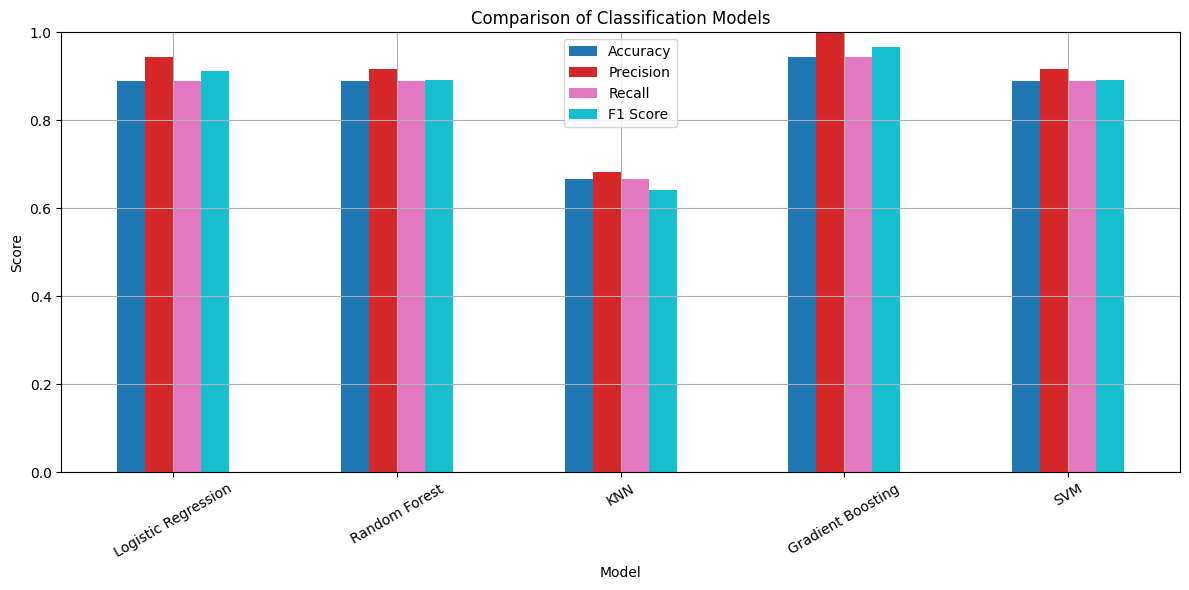

In [79]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Collect metrics for all models
models_metrics = {
    "Model": ["Logistic Regression", "Random Forest", "KNN", "Gradient Boosting", "SVM"],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

# Function to compute all metrics
def get_all_metrics(y_true, y_pred):
    return (
        accuracy_score(y_true, y_pred),
        precision_score(y_true, y_pred, average='weighted'),
        recall_score(y_true, y_pred, average='weighted'),
        f1_score(y_true, y_pred, average='weighted')
    )

# Logistic Regression
acc, prec, rec, f1 = get_all_metrics(y_test, LR_model.predict(X_test))
models_metrics["Accuracy"].append(acc)
models_metrics["Precision"].append(prec)
models_metrics["Recall"].append(rec)
models_metrics["F1 Score"].append(f1)

# Random Forest
acc, prec, rec, f1 = get_all_metrics(y_test, RFC_model.predict(X_test))
models_metrics["Accuracy"].append(acc)
models_metrics["Precision"].append(prec)
models_metrics["Recall"].append(rec)
models_metrics["F1 Score"].append(f1)

# KNN
acc, prec, rec, f1 = get_all_metrics(y_test, KNN_model.predict(X_test))
models_metrics["Accuracy"].append(acc)
models_metrics["Precision"].append(prec)
models_metrics["Recall"].append(rec)
models_metrics["F1 Score"].append(f1)

# Gradient Boosting
acc, prec, rec, f1 = get_all_metrics(y_test, GBC_model.predict(X_test))
models_metrics["Accuracy"].append(acc)
models_metrics["Precision"].append(prec)
models_metrics["Recall"].append(rec)
models_metrics["F1 Score"].append(f1)

# SVM
acc, prec, rec, f1 = get_all_metrics(y_test, SVM_clf.predict(X_test))
models_metrics["Accuracy"].append(acc)
models_metrics["Precision"].append(prec)
models_metrics["Recall"].append(rec)
models_metrics["F1 Score"].append(f1)

# Create a DataFrame
df_results = pd.DataFrame(models_metrics)

# Display as a table
print("\nModel Performance Comparison:\n")
print(df_results)

# Optional: Plot the metrics for better visualization
import matplotlib.pyplot as plt

df_results.set_index('Model').plot(kind='bar', figsize=(12, 6), ylim=(0, 1), colormap='tab10')
plt.title("Comparison of Classification Models")
plt.ylabel("Score")
plt.grid(True)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [82]:
# Calculate accuracy for each model and multiply by 100

from sklearn.metrics import accuracy_score

# Accuracies (multiplied by 100)
accuracy_lr = accuracy_score(y_test, LR_y_pred) * 100
accuracy_rfc = accuracy_score(y_test, RFC_y_pred) * 100
accuracy_knn = accuracy_score(y_test, KNN_y_pred) * 100
accuracy_gbc = accuracy_score(y_test, GBC_y_pred) * 100
accuracy_svm = accuracy_score(y_test, SVM_y_pred) * 100



# Print each model's accuracy
print(f"Logistic Regression Accuracy      : {accuracy_lr:.2f}%")
print(f"Random Forest Accuracy            : {accuracy_rfc:.2f}%")
print(f"K-Nearest Neighbors Accuracy      : {accuracy_knn:.2f}%")
print(f"Gradient Boosting Accuracy        : {accuracy_gbc:.2f}%")
print(f"Support Vector Machine Accuracy   : {accuracy_svm:.2f}%")




Logistic Regression Accuracy      : 88.89%
Random Forest Accuracy            : 88.89%
K-Nearest Neighbors Accuracy      : 66.67%
Gradient Boosting Accuracy        : 94.44%
Support Vector Machine Accuracy   : 88.89%


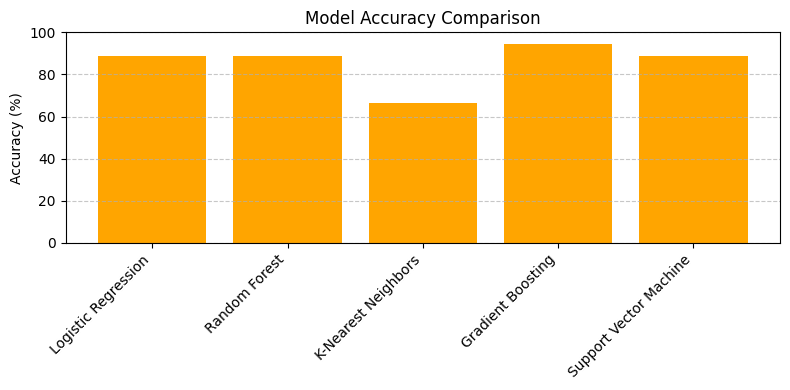

In [84]:
import matplotlib.pyplot as plt

# Accuracy values
models = [
    'Logistic Regression',
    'Random Forest',
    'K-Nearest Neighbors',
    'Gradient Boosting',
    'Support Vector Machine'
]
accuracies = [88.89, 88.89, 66.67, 94.44, 88.89]

# Plotting with updated style
plt.figure(figsize=(8, 4))  # Smaller size
plt.bar(models, accuracies, color='orange')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


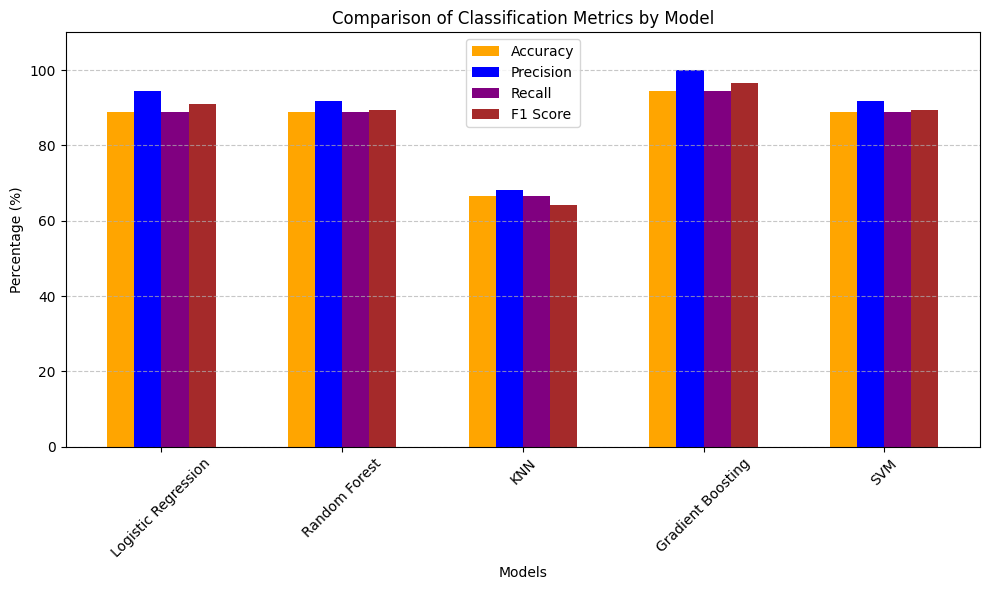

In [85]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame with the model performance metrics
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'KNN', 'Gradient Boosting', 'SVM'],
    'Accuracy': [0.888889, 0.888889, 0.666667, 0.944444, 0.888889],
    'Precision': [0.944444, 0.916667, 0.682540, 1.000000, 0.916667],
    'Recall': [0.888889, 0.888889, 0.666667, 0.944444, 0.888889],
    'F1 Score': [0.911111, 0.892593, 0.640741, 0.966667, 0.892593]
}

df = pd.DataFrame(data)

# Plotting the metrics
plt.figure(figsize=(10, 6))
bar_width = 0.15
x = range(len(df['Model']))

plt.bar([i - 1.5 * bar_width for i in x], df['Accuracy']*100, width=bar_width, label='Accuracy', color='orange')
plt.bar([i - 0.5 * bar_width for i in x], df['Precision']*100, width=bar_width, label='Precision', color='blue')
plt.bar([i + 0.5 * bar_width for i in x], df['Recall']*100, width=bar_width, label='Recall', color='purple')
plt.bar([i + 1.5 * bar_width for i in x], df['F1 Score']*100, width=bar_width, label='F1 Score', color='brown')

plt.xlabel('Models')
plt.ylabel('Percentage (%)')
plt.title('Comparison of Classification Metrics by Model')
plt.xticks(ticks=x, labels=df['Model'], rotation=45)
plt.ylim(0, 110)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
